# Project 3 : Investigations on Monte Carlo Methods
### Author: Ishan Mohanty
### USC ID: 4461-3447-18
### NET ID: imohanty
### Email: imohanty@usc.edu
### /###################################################################################/

### Import Libraries and Other Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.stats import multivariate_normal
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

### Problem1: Area-Estimation

i.) Generate n=500 samples (X, Y) of i.i.d 2-dimensional uniform random variables in the unit-square.

ii.) Write a function that counts how many of these samples fall within the region, D, formed by the
intersection of two quarter unit-circles centered at the origin and at (1,1) as shown above.

iii.) Use these random samples to estimate the area of the inscribed region D. Use this area estimate to
estimate the area of D. Do k=50 runs of these estimations. Plot the histogram of the k=50 area estimates.

iv.) Repeat the experiment with different numbers of uniform samples, n. Plot the sample variance of the
Monte Carlo estimates as a function of your sample size n. Keep k=50 for all these runs. Comment on
the sample variance of your estimates.

In [90]:
n = 500
point_xy = np.random.uniform(low=0,high=1,size=(n,2))

### Function to count all the samples inside the region D

In [91]:
"""
count points inside region D.
@param points: pair of (x,y) points
       n: number of points
@return in_count: points inside region D
        label: labelled points , either 0 or 1
"""
def count_points(points,n):
    R = 1.0
    r1 = np.zeros(shape=(n))
    r2 = np.zeros(shape=(n))
    label = np.zeros(shape=(n))
    in_count = 0
    for i in range(n):
        r1[i] = np.sqrt(points[i,0]**2 + points[i,1]**2)
        r2[i] = np.sqrt( (points[i,0]-1)**2 + (points[i,1]-1)**2 )
        if( r1[i] <= R and r2[i] <= R ):
            in_count+=1
            label[i]=1
        else:
            label[i]=0
    return in_count,label

### Average Area and Histogram of Monte-Carlo Area Estimates

Average Area Estimate: 0.57444


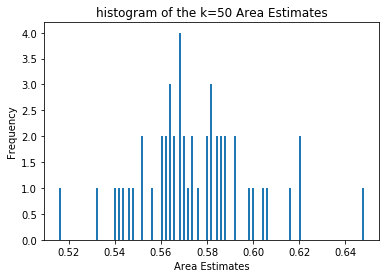

In [94]:
area = []
runs = 50
n = 500
dim = 2
for k in range(runs):
    point_xy = np.random.uniform(low=0,high=1,size=(n,dim))
    inside, __ = count_points(point_xy,n)
    area.append(inside/n)
print("Average Area Estimate:",np.mean(area))
plt.hist(area,bins=150)
plt.xlabel('Area Estimates')
plt.ylabel('Frequency')
plt.title('histogram of the k=50 Area Estimates')
plt.show()

### Generated Samples Represented on the unit square

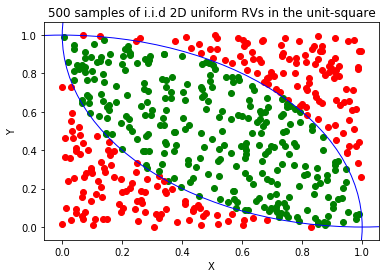

283 points inside marked in green
217 points outside marked in red


In [95]:
in_area , labels = count_points(point_xy,500)
circle1 = plt.Circle((0, 0),1,color='blue',fill=False)
circle2 = plt.Circle((1,1),1,color='blue',fill=False)
fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.add_artist(circle2)
for i in range(len(labels)):
    if labels[i] == 1:
        plt.scatter(point_xy[i,0],point_xy[i,1],color='g')
    else:
        plt.scatter(point_xy[i,0],point_xy[i,1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('500 samples of i.i.d 2D uniform RVs in the unit-square')
plt.show()
print(in_area,"points inside marked in green")
print(500-in_area,"points outside marked in red")

### Sample Variance of the Monte Carlo estimates as a function of your sample size n

In [96]:
n_samples = [100,250,350,500,750,900,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500]
area_list = []
sample_var_list = []
runs = 50

for num in n_samples:
    for k in range(runs):
        point_xy = np.random.uniform(low=0,high=1,size=(num,2))
        inside, __ = count_points(point_xy,num)
        area_list.append(inside/num)
    sample_var_list.append(np.var(area_list))

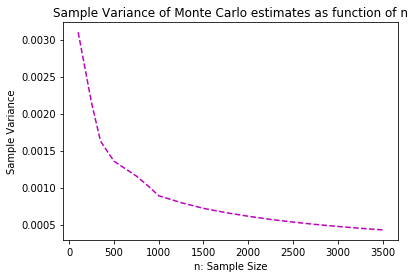

In [97]:
plt.plot(n_samples,sample_var_list,'m--')
plt.xlabel('n: Sample Size')
plt.ylabel('Sample Variance')
plt.title('Sample Variance of Monte Carlo estimates as function of n')
plt.show()

### Summary:

1. Generate 500 samples of 2D uniform random variables in the unit-square.
2. if the following conditons are satisfied then the points are inside the circle:
   for the points (X,Y),
   
   if,  ${X^2}$ + ${Y^2}$ $<=$ $R$  and ${(X-1)^2}$ + ${(Y-1)^2}$ $<=$ $R$,
        
      where $R$ = 1
   
   else,
      the points are outside.

3. #### Monte-Carlo Area Estimate of the region D = Number of points inside D (Green Points)  / Total number of points 

4. Find 50 such Monte-Carlo Area Estimates and plot the histogram of the 50 Area Estimates.
5. Take the average of the 50 Monte-Carlo Area Estimates. This gives us the final Average Monte-Carlo Area Estimate
6. Repeat the experiment with different numbers of uniform samples, n and Plot the sample variance of the Monte Carlo estimates as a function of your sample size n.
       
### Results:

1. Expected Area of Region D : A = 1 - 2*(1-$\pi$/4) = 0.57079 $unit^2$
2. The Average Area Estimated by our Monte-Carlo method = 0.57444 $unit^2$
3. As the Sample Size n, increases the Sample Variance of the Monte-Carlo Estimates Decreases. Hence, Sample size is inversely proportional to Sample Variance of the Monte-Carlo Estimates. This is primarily due to the law of large numbers coming into the picture.

### Problem 2: Monte Carlo Integration and Variance Reduction Strategies

Use n=1000 random samples to obtain Monte Carlo estimates for the definite integrals:


(a) 1/[1+sinh(2x)ln(x)], x in [0.8,3]


(b) Exp[-x4 – y4], (x, y) in [-pi, pi]


Calculate the sample variance of the Monte Carlo estimates using a similar method as in problem 1.
Use the same number of random samples, n=1000, to obtain those Monte Carlo estimates. But this time
incorporate stratification and importance sampling in the Monte Carlo estimation procedures. Compare
the Monte Carlo estimates and their sample variances.
Discuss the quality of the Monte Carlo estimates from each method. Also discuss the strengths and
weaknesses of stratification and importance sampling in Monte Carlo estimation.


Test your integral estimator on the following function with your own choice of n samples:
𝑓(𝑥, 𝑦) = 20 + 𝑥 + 𝑦 − 10(𝑐𝑜𝑠[2𝜋𝑥] + 𝑐𝑜𝑠[2𝜋𝑦])
(x, y) in [-5, 5] for f(x,y)

### Function Plots

### f(x) = 1/[1+sinh(2x)ln(x)]

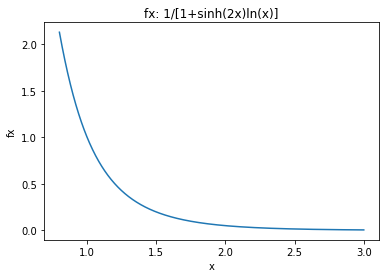

In [98]:
x = np.linspace(0.8,3,1000)
fx = 1/(1+(np.sinh(2*x)*np.log(x)))
plt.plot(x,fx)
plt.xlabel('x')
plt.ylabel('fx')
plt.title('fx: 1/[1+sinh(2x)ln(x)]')
plt.show()

### fx = Exp[-x4 – y4]

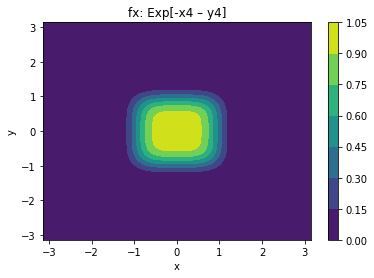

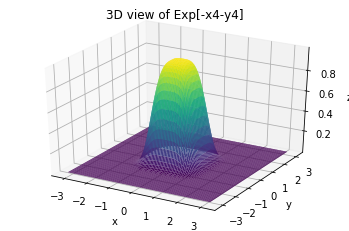

In [3]:
x = np.linspace(-1*np.pi, np.pi, 100)
y = np.linspace(-1*np.pi, np.pi, 100)
x , y = np.meshgrid(x, y)

fx = np.exp( -1*(x**4) + -1*(y**4) )
fig = plt.figure()
cp = plt.contourf(x, y, fx)
plt.colorbar(cp)
plt.xlabel('x')
plt.ylabel('y')
plt.title('fx: Exp[-x4 – y4]')
plt.show()

fx = np.exp( -1*(x**4) + -1*(y**4) )
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, fx, rstride=1, cstride=1,cmap='viridis',edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D view of Exp[-x4-y4]')
plt.show()

### f(x,y) = 20 + x + y − 10(cos[2$\pi$x] + cos[2$\pi$y])

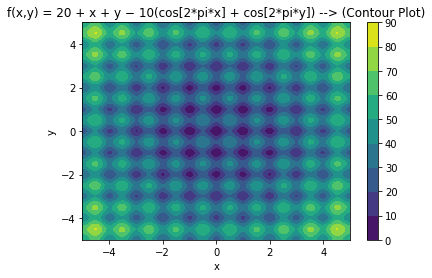

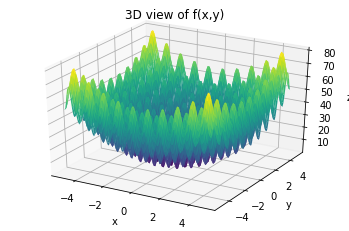

In [100]:
x = np.linspace(-5,5, 100)
y = np.linspace(-5,5, 100)
x , y = np.meshgrid(x, y)

fx = 20 + x**2 + y**2 - 10*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))
fig = plt.figure()
cp = plt.contourf(x, y, fx)
plt.colorbar(cp)
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x,y) = 20 + x + y − 10(cos[2*pi*x] + cos[2*pi*y]) --> (Contour Plot)')
plt.show()

fx = 20 + x**2 + y**2 - 10*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, fx, rstride=1, cstride=1,cmap='viridis',edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D view of f(x,y)')
plt.show()

### Crude/Basic Monte Carlo Method

In [101]:
"""
Crude/Basic Monte-Carlo Method for Definite Integrals
@param choice: 0, 1, 2 --> for different integrand functions
@return mc: Mean Monte-Carlo Estimate
        sv: Sample Variance of Monte-Carlo Estimate
"""
def crude_mc_method(choice):
    epochs = 50
    mc_est = []
    n=1000
    for k in range(epochs):
        if choice == 0:
            a = 0.8
            b = 3
            x = np.random.uniform(a,b,n)        
            fx = 1/(1+(np.sinh(2*x)*np.log(x)))
            limit_range = b - a
            integral = limit_range*(np.mean(fx))
            
        elif choice == 1:
            a = -1*np.pi
            b = np.pi
            x = np.random.uniform(a,b,n)
            y = np.random.uniform(a,b,n)
           
            fx = np.exp( -1*(x**4) + -1*(y**4) )
            limit_range = b - a
            integral = limit_range*limit_range*(np.mean(fx))
            
        elif choice == 2:
            a = -5
            b = 5
            x = np.random.uniform(a,b,100000)
            y = np.random.uniform(a,b,100000)
            fx = 20 + x**2 + y**2 - 10*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))
            limit_range = b - a
            integral = limit_range*limit_range*(np.mean(fx))
            
        else:
            print("Wrong Choice! Re-Enter")
            
        mc_est.append(integral)
        
    mc = np.mean(mc_est)
    sv = np.var(mc_est)
    return mc,sv

### Basic Monte-Carlo Estimate & Sample Variance for definite integral of : f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]

In [102]:
mc,sv = crude_mc_method(0)
print("Mean Crude/Basic Monte-Carlo Estimate:",np.round(mc,6))
print("Sample Variance for the Estimate:",np.round(sv,6))

Mean Crude/Basic Monte-Carlo Estimate: 0.601155
Sample Variance for the Estimate: 0.000911


### Basic Monte-Carlo Estimate & Sample Variance for definite integral of : fx = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]

In [110]:
mc,sv = crude_mc_method(1)
print("Mean Crude/Basic Monte-Carlo Estimate:",np.round(mc,6))
print("Sample Variance for the Estimate:",np.round(sv,6))

Mean Crude/Basic Monte-Carlo Estimate: 3.289857
Sample Variance for the Estimate: 0.064368


### Stratification Sampling

### Plots depicting Strategy to Perform Stratification Sampling

### f(x) = 1/[1+sinh(2x)ln(x)]

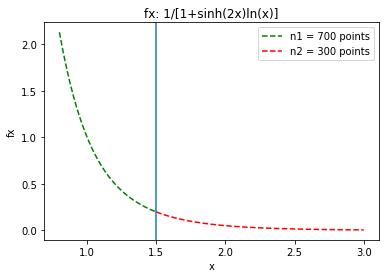

In [111]:
x1 = np.linspace(0.8,1.5,700)
x2 = np.linspace(1.5,3,300)
fx = 1/(1+(np.sinh(2*x1)*np.log(x1)))
gx = 1/(1+(np.sinh(2*x2)*np.log(x2)))
plt.plot(x1,fx,'g--',label='n1 = 700 points')
plt.plot(x2,gx,'r--',label='n2 = 300 points')
plt.xlabel('x')
plt.ylabel('fx')
plt.title('fx: 1/[1+sinh(2x)ln(x)]')
plt.legend()
plt.axvline( x = 1.5 )
plt.show()

### fx = Exp[-x4 – y4]

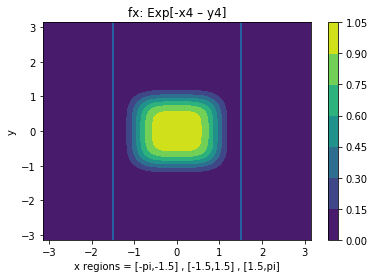

In [112]:
x = np.linspace(-1*np.pi, np.pi, 100)
y = np.linspace(-1*np.pi, np.pi, 100)
x , y = np.meshgrid(x, y)

fx = np.exp( -1*(x**4) + -1*(y**4) )
fig = plt.figure()
cp = plt.contourf(x, y, fx)
plt.colorbar(cp)
plt.xlabel('x regions = [-pi,-1.5] , [-1.5,1.5] , [1.5,pi]')
plt.ylabel('y')
plt.title('fx: Exp[-x4 – y4]')
plt.axvline( x = -1.5 )
plt.axvline( x =  1.5 )
plt.show()

In [113]:
"""
Stratified Sampling Monte-Carlo Method for Definite Integrals
@param choice: 0, 1 --> for different integrand functions
@return mc: Mean Monte-Carlo Estimate
        sv: Sample Variance of Monte-Carlo Estimate
"""
def stratified_mc_method(choice):
    epochs = 50
    mc_est = []
    for k in range(epochs):  
        if choice == 0: 
            n1=700
            n2=300
            
            a = 0.8
            b = 1.5
            x1 = np.random.uniform(a,b,n1)
            fx1 = 1/(1+(np.sinh(2*x1)*np.log(x1)))
            
            c = 3
            x2 = np.random.uniform(b,c,n2)
            fx2 = 1/(1+(np.sinh(2*x2)*np.log(x2)))
            
            limit_range_1 = b - a
            integral_1 = limit_range_1*(np.mean(fx1))
            limit_range_2 = c - b
            integral_2 = limit_range_2*(np.mean(fx2))
            
            mc_est.append(integral_1+integral_2)
            
        elif choice == 1: 
            n1 = 100
            n2 = 800
            n3 = 100
            
            a = -1*np.pi
            b = -1.5
            x1 = np.random.uniform(a,b,n1)
            y1 = np.random.uniform(a,b,n1)
            fx1 = np.exp( -1*(x1**4)+ -1*(y1**4) )
            
            c = 1.5
            x2 = np.random.uniform(b,c,n2)
            y2 = np.random.uniform(b,c,n2)
            fx2 = np.exp( -1*(x2**4) + -1*(y2**4) )
            
            d = np.pi
            x3 = np.random.uniform(c,d,n3)
            y3 = np.random.uniform(c,d,n3)
            fx3 = np.exp( -1*(x3**4) + -1*(y3**4) )
            
            limit_range_1 = b - a
            integral_1 = (limit_range_1**2)*(np.mean(fx1))
            limit_range_2 = c - b
            integral_2 = (limit_range_2**2)*(np.mean(fx2))
            limit_range_3 = d - c
            integral_3 = (limit_range_3**2)*(np.mean(fx3))
            
            mc_est.append(integral_1+integral_2+integral_3)
              
    mc = np.mean(mc_est)
    sv = np.var(mc_est)
    return mc,sv

### Stratification Sampling Based Monte-Carlo Estimate & Sample Variance for definite integral of : 
### f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]

In [117]:
mc,sv = stratified_mc_method(0)
print("Stratification Sampling Monte-Carlo Estimate:",np.round(mc,6))
print("Sample Variance for the Estimate:",np.round(sv,6))

Stratification Sampling Monte-Carlo Estimate: 0.608873
Sample Variance for the Estimate: 0.000227


### Stratification Sampling Based Monte-Carlo Estimate & Sample Variance for definite integral of : 
### fx = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]

In [118]:
mc,sv = stratified_mc_method(1)
print("Stratification Sampling Monte-Carlo Estimate:",np.round(mc,6))
print("Sample Variance for the Estimate:",np.round(sv,6))

Stratification Sampling Monte-Carlo Estimate: 3.275462
Sample Variance for the Estimate: 0.014568


### Importance Sampling

### Plots for Target pdf (fx) and Proposal pdf (gx)

### 1.
### f(x) = 1/[1+sinh(2x)ln(x)]
### g(x) =  truncated normal pdf

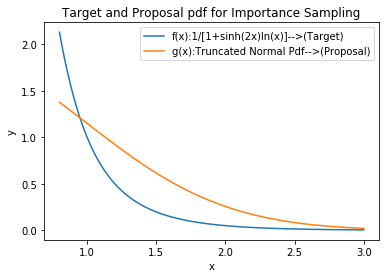

In [119]:
x = np.linspace(0.8,3,1000)
fx = 1/(1+(np.sinh(2*x)*np.log(x)))
plt.plot(x,fx,label='f(x):1/[1+sinh(2x)ln(x)]-->(Target)')
pdf = truncnorm.pdf(x, 0.8,3,loc=0)
plt.plot(x,pdf,label='g(x):Truncated Normal Pdf-->(Proposal)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Target and Proposal pdf for Importance Sampling')
plt.legend()
plt.show()

### 2.
### fx = Exp[-x4 – y4]
### gx = Multi-variate Gaussian pdf with mean = [0,0] and covariance = [[1,0],[0,1]] = Identity Matrix

### (i) Contour Plot

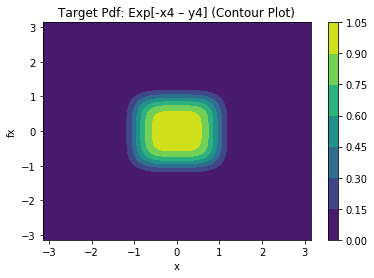

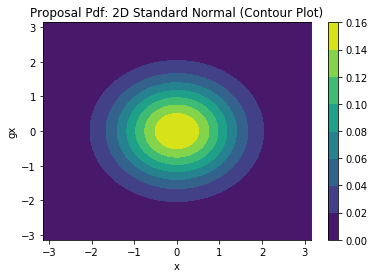

In [120]:
x = np.linspace(-1*np.pi, np.pi, 1000)
y = np.linspace(-1*np.pi, np.pi, 1000)
x , y = np.meshgrid(x, y)

fx = np.exp( -1*(x**4) + -1*(y**4) )
fig = plt.figure()
cp = plt.contourf(x, y, fx)
plt.colorbar(cp)
plt.xlabel('x')
plt.ylabel('fx')
plt.title('Target Pdf: Exp[-x4 – y4] (Contour Plot)')
plt.show()

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]])
fig = plt.figure()
cp = plt.contourf(x, y,rv.pdf(pos))
plt.colorbar(cp)
plt.xlabel('x')
plt.ylabel('gx')
plt.title('Proposal Pdf: 2D Standard Normal (Contour Plot)')
plt.show()

### (ii) 3D Plot

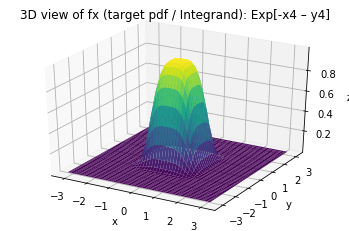

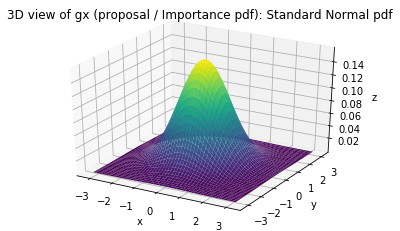

In [5]:
x = np.linspace(-1*np.pi, np.pi, 50)
y = np.linspace(-1*np.pi, np.pi, 50)
x , y = np.meshgrid(x, y)

fx = np.exp( -1*(x**4) + -1*(y**4) )
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, fx, rstride=1, cstride=1,cmap='viridis',edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D view of fx (target pdf / Integrand): Exp[-x4 – y4]')
plt.show()

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y,rv.pdf(pos), rstride=1, cstride=1,cmap='viridis',edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D view of gx (proposal / Importance pdf): Standard Normal pdf')
plt.show()

In [122]:
"""
Importance Sampling Monte-Carlo Method for Definite Integrals
@param choice: 0, 1 --> for different integrand functions
@return mc: Mean Monte-Carlo Estimate
        sv: Sample Variance of Monte-Carlo Estimate
"""
def importance_sampling(choice):
    epochs = 50
    mc_est = []
    for k in range(epochs):  
        if choice ==0:
            a = 0.8
            b = 3
            x = truncnorm.rvs(a,b, size=1000)
            fx = 1/(1+(np.sinh(2*x)*np.log(x)))
            gx = truncnorm.pdf(x,a,b,loc=0)
            ex = np.mean(fx/gx)
        if choice ==1:
            a = -1*np.pi
            b = np.pi
            num_samples=0
            valid_x=[]
            while num_samples != 1000:
                x = multivariate_normal.rvs(mean=[0,0],cov=[[1,0],[0,1]])
                if ( np.min(x) >= a and np.max(x) <= b ):
                    valid_x.append(x)
                    num_samples+=1
            valid_x = np.asarray(valid_x)
            fx = np.exp( -1*(valid_x[:,0]**4) + -1*(valid_x[:,1]**4) )
            gx = multivariate_normal.pdf(valid_x,mean = [0, 0] ,cov = [[1, 0], [0, 1]])
            ex = np.mean(fx/gx)
        mc_est.append(ex)
    mc = np.mean(mc_est)
    sv = np.var(mc_est)
    return mc,sv        

### Importance Sampling Based Monte-Carlo Estimate & Sample Variance for definite integral: 
### f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]

In [124]:
mc,sv = importance_sampling(0)
print("Importance-Sampling Monte-Carlo Estimate:",np.round(mc,6))
print("Sample Variance for the Estimate:",np.round(sv,6))

Importance-Sampling Monte-Carlo Estimate: 0.609807
Sample Variance for the Estimate: 0.000157


### Importance Sampling Based Monte-Carlo Estimate & Sample Variance for definite integral: 
### fx = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]

In [126]:
mc,sv = importance_sampling(1)
print("Importance-Sampling Monte-Carlo Estimate:",np.round(mc,6))
print("Sample Variance for the Estimate:",np.round(sv,6))

Importance-Sampling Monte-Carlo Estimate: 3.295746
Sample Variance for the Estimate: 0.006724


### integral estimator on the following function with your own choice of n samples:
### 𝑓(𝑥, 𝑦) = 20 + 𝑥 + 𝑦 − 10(𝑐𝑜𝑠[2𝜋𝑥] + 𝑐𝑜𝑠[2𝜋𝑦]) , (x, y) in [-5, 5] for f(x,y)

In [127]:
mc,sv = crude_mc_method(2)
print("Mean Crude/Basic Monte-Carlo Estimate:",np.round(mc,6))
print("Sample Variance for the Estimate:",np.round(sv,6))

Mean Crude/Basic Monte-Carlo Estimate: 3666.70307
Sample Variance for the Estimate: 21.721834


### Summary:

We perform 3 Monte-Carlo Methods to evaluate the definite integrals, which are namely:
1. Crude/Basic Monte-Carlo Method
2. Stratification Sampling Monte-Carlo Method
3. Importance Sampling Monte-Carlo Method.

Let us Now Discuss the Procedure for each of the three Methods in detail:

### (i). Crude/Basic Monte-Carlo Method:

1. Generate uniform random samples of x and/or y from the defined limit range.
2. Calculate fx with the given random samples in the specified range.
3. Define range = upper limit - lower limit.
4. Evaluate the integrand by multiplying the range with the calculated fx.
6. We have obtained the Basic Monte-Carlo Estimate.
7. We run this for 50 epochs and make a list of 50 such Basic Monte-Carlo Estimates using the above steps.
8. Calculate the Mean or Average of the 50 Basic Monte-Carlo Estimates.
9. Calculate the Sample Variance of the 50 Basic Monte-Carlo Estimates.

#### a. f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]
   range = 3 - 0.8 = 2.2 , N=1000
   
   generate N samples from 0.8 to 3 randomly and Calculate fx
   
   definite integral = range*( sum(f(x)) / N )
   
#### b. f(x,y) = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]
   range_x and range_y = $\pi$ - (-$\pi$) = 2$\pi$ , N=1000
   
   generate N samples from -$\pi$ to $\pi$ randomly and Calculate f(x,y)
   
   definite integral = range_x * range_y * ( sum( f(x,y) ) / N )

### (ii). Stratification Sampling Monte-Carlo Method:

1. Divide the area of the function fx into k number of regions.
2. Generate uniform random samples of x and/or y from the particular kth region with different number of sampling points.
3. Number of Sampling points is assigned based on where most of the area under the curve is determined. Hence, more the area, more is the points in the given region and vice versa.
4. Calculate fx with the given random samples in the specified region.
5. Define range = upper limit - lower limit region-wise.
6. Evaluate the integrand by multiplying the range with the calculated fx of the particular region.
   we should obtain k such integral values.
7. Adding these integrals from k regions gives us the final Stratified Sampled Monte-Carlo Estimate.
8. We run this for 50 epochs and make a list of 50 such Stratified Sampled Monte-Carlo Estimates using the above steps.
9. Calculate the Mean or Average of the 50 Stratified Sampled Monte-Carlo Estimates.
10. Calculate the Sample Variance of the 50 Stratified Sampled Monte-Carlo Estimates.

#### a. f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]
   for the above integrand, the strategy for Stratified Sampling is given below.
   
   we divide the area into 2 regions, 
   
   region 1: low= 0.8 , high = 1.5 and Number of Points = 700, has a lot of area under the curve
   
   region 2: low= 1.5 , high = 3 and Number of Points = 300, has less area under the curve
   
   use the crude/basic method for integrand calculation for each region
   
#### b. fx = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]
   for the above integrand, the strategy for Stratified Sampling is given below.
   we divide the area into 3 regions, 
   
   region 1: low= -$\pi$ , high = -1.5 and Number of Points = 100, has less area under the curve
   
   region 2: low= -1.5 , high = 1.5 and Number of Points = 800, has a lot of area under the curve
   
   region 3: low= 1.5 , high = $\pi$ and Number of Points = 100, has less area under the curve
   
   use the crude/basic method for integrand calculation for each region

### (ii). Importance Sampling Monte-Carlo Method:
   The Concept behind the Importance Sampling is very powerful and yet simple. If we want to evaluate the definite integral of fx and cannot sample from it's given pdf easily due to it's complexity, we turn to importance sampling. Importance sampling suggests that we use a Proposal/weight/Importance pdf gx and draw samples from it to re-weight the integrand using important weights so that the right distribution can be calculated for the integration task. This is very powerful and lowers the sample variance. We do not use samples from the uniform random distribution here.
   
Some Properties of gx are:
1. gx is integrable.
2. gx is not negative throughtout the domain range.
3. Integral of gx has an inverse
4. gx has to integrate to 1 in the domain range.
   
Procedure:
   
1. Determine Proposal Pdf / Weight Pdf gx and draw N random samples from it within the specified range.
2. Calculate fx with the given random samples.
3. Get the pdf values of Weighted Pdf gx.
4. Divide fx / gx and sum across all samples and finally take the average. This gives us Ex = sum( fx / gx )/N.
5. Ex is the Monte-Carlo Estimate using Importance-Sampling.
6. We run this for 50 epochs and make a list of 50 such Importance-Sampling Monte-Carlo Estimates using the above steps.
7. Calculate the Mean or Average of the 50 Importance-Sampling Monte-Carlo Estimates.
8. Calculate the Sample Variance of the 50 Importance-Sampling Monte-Carlo Estimates.

#### a. f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]
   gx was chosen as the truncated normal pdf in the range of [0.8,3] as shown above in the plots.
   
#### b. fx = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]
   gx was chosen as the multi-variate 2D standard normal Gaussian pdf with Mean = [0,0] and 
   
   Covariance = [[1,0],[0,1]] or the 2x2 Indentity Matrix , in the range of [-$\pi$, $\pi$]
   
###  To Calculate using Importance Sampling,  I = $\int_{a}^{b} $ $fx$ $dx$

Choose gx , weight / proposal pdf with the above mentioned properties.

Now we reweight the Integrand fx using Importance weights, 

### I = $\int_{a}^{b} $ ($fx$ / $gx$) * $gx$ $dx$

### I = $E[ $($fx$ / $gx$) $ ]$

### Using Monte Carlo Estimate Method,   

### I = $1/N$ $\sum_{i=1}^{N} $($fx_i$ / $gx_i$) $ $





#################################################################################################################



### Results:

### (1) Crude/Basic Monte-Carlo Method:

#### a. f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]

Mean Crude/Basic Monte-Carlo Estimate: 0.601155

Sample Variance for the Estimate: 0.000911

#### b. f(x,y) = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]

Mean Crude/Basic Monte-Carlo Estimate: 3.289857

Sample Variance for the Estimate: 0.064368

### (2) Stratification Sampling Monte-Carlo Method:

#### a. f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]

Stratification Sampling Monte-Carlo Estimate: 0.608873

Sample Variance for the Estimate: 0.000227


#### b. f(x,y) = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]

Stratification Sampling Monte-Carlo Estimate: 3.275462

Sample Variance for the Estimate: 0.014568

### (3) Importance Sampling Monte-Carlo Method:

#### a. f(x) = 1/[1+sinh(2x)ln(x)] , x in [0.8,3]

Importance-Sampling Monte-Carlo Estimate: 0.609807

Sample Variance for the Estimate: 0.000157

#### b. f(x,y) = Exp[-x4 – y4] , (x, y) in [-$\pi$, $\pi$]

Importance-Sampling Monte-Carlo Estimate: 3.295746

Sample Variance for the Estimate: 0.006724


### Discussion of Results:

#### 1. Expected Value (Calculated from Wolfram Alpha) :  https://www.wolframalpha.com/examples/mathematics/calculus-and-analysis/integrals/

I = $\int_{0.8}^{3} 1/[1+sinh(2x)ln(x)] {dx}$ = 0.609553

#### Calculated Estimated value obtained by:

crude/basic: 0.601155

Stratified Sampling: 0.608873

Importance Sampling: 0.609807

#### Calculated Sample Variance value Obtained by:

crude/basic: 0.000911

Stratified Sampling: 0.000227

Importance Sampling: 0.000157


#### 2. Expected Value (Calculated from Wolfram Alpha) :  https://www.wolframalpha.com/examples/mathematics/calculus-and-analysis/integrals/


I = $\int_{{-\pi}}^{{\pi}} Exp[-x4 – y4]$  ${dx} {dy}$ = 3.28626

#### Calculated Estimated value obtained by:

crude/basic: 3.289857

Stratified Sampling: 3.275462

Importance Sampling: 3.295746

#### Calculated Sample Variance value Obtained by:

crude/basic: 0.064368

Stratified Sampling: 0.014568

Importance Sampling: 0.006724

#### From the Above results we can observe that:

1. All the Monte-Carlo Methods give fairly accurate estimates, we cannot choose one from another based only on estimates. If we do choose based on momentary values obtained, below are the results.
2. For the I = $\int_{0.8}^{3} 1/[1+sinh(2x)ln(x)] {dx}$, if we had to rank them according to performance we see that Importance Sampling did the best followed by Stratified Sampling and basic Monte-Carlo Method.
3. For the I = $\int_{{-\pi}}^{{\pi}} Exp[-x4 – y4]$  ${dx} {dy}$, , if we had to rank them according to performance we see that crude/basic Monte-Carlo method did the best followed by a tie between Stratified and Importance Sampling.
4. Sample Variance Ranking: lowest to highest --> Importance Sampling, Stratification Sampling and thn Crude/Basic Sampling. Therefore, we get the lowest and the best Sample Variance result for Importance Sampling.

#### Based on the above results we see now can discuss the strengths and weaknesses of each method:

##### Crude/Basic Method:

Strength: It is very simple to implement and execute. We get really good accuracy results as well. Therefore, this can be used to estimate complicated definite integrals.

Weakness: it has a very high variance compared to the stratified and importance sampling method.

#### Stratified Sampling Method:

Strength: It produces lesser variance than the Basic/Crude method and can be used to estimate definite integral functions which have localized discontinuities. It also produces accurate results if correctly used i.e the regions are properly partitioned.

Weakness: For higher Dimensional functions and Complex integrands/Functions it becomes difficult to partition regions very effectively.

#### Importance Sampling Method:

Strength: It has the lowest variance amongst all the 3 methods and gives fairly accurate results if gx, the importance pdf, is correctly chosen.

Weakness: For Complex and high dimensional functions it becomes very difficult to choose an appropriate gx(the weight/importance/proposal pdf) because it is difficult to visualize. Hence, This method fails in this scenario.


### The Integral estimator on the following function with 100,000 samples:
### 𝑓(𝑥, 𝑦) = 20 + 𝑥 + 𝑦 − 10(𝑐𝑜𝑠[2𝜋𝑥] + 𝑐𝑜𝑠[2𝜋𝑦]) , (x, y) in [-5, 5] for f(x,y)

The Basic/Crude Method was used to estimate f(x,y) because of the following reasons:
1. It is very simple to calculate and execute.
2. Since this is a complex function, stratified sampling can fail in exactly partitioning the function into regions.
3. Since, it is also difficult to visualize the plot, we have a tough time finding the importance pdf gx.

##### Results Obtained:

#### 1. Expected Value (Calculated from Wolfram Alpha) :  https://www.wolframalpha.com/examples/mathematics/calculus-and-analysis/integrals/

### I =  $\int_{-5}^{5} 𝑓(𝑥, 𝑦) = 20 + 𝑥 + 𝑦 − 10(𝑐𝑜𝑠[2𝜋𝑥] + 𝑐𝑜𝑠[2𝜋𝑦])$  $dx dy$ = $3666.67$

Mean Crude/Basic Monte-Carlo Estimate: 3666.70307

Sample Variance for the Estimate: 21.721834

#### We observe that the larger the n samples, the estimate becomes closer to the expected value and sample variance also decreases.